In [1]:
%%html
<style>
.cell-output-ipywidget-background {
    background-color: transparent !important;
}
:root {
    --jp-widgets-color: var(--vscode-editor-foreground);
    --jp-widgets-font-size: var(--vscode-editor-font-size);
}  
</style>

In [ ]:
import datetime
import pyaurorax
import numpy as np

aurorax = pyaurorax.PyAuroraX()
at = aurorax.tools
at.set_theme("dark")

In [ ]:
# Download 1 minute of TREx RGB Burst data. Burst data is extremely large.
# When working with burst data, it is best to load it in piece by piece.
# The ability to read in burst data files will depend on your computer's 
# resources, as large amounts of data will require more memory.

# For now, let's download 5 minutes of burst data. This is enough
# to make a keogram due to the high cadence.
dataset_name = "TREX_RGB_RAW_BURST"
start_dt = datetime.datetime(2023, 2, 24, 6, 0)
end_dt = datetime.datetime(2023, 2, 24, 6, 4)
r = aurorax.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid="rabb", n_parallel=4)

In [4]:
# Read in the data
data = aurorax.data.ucalgary.read(r.dataset, r.filenames, n_parallel=4)

In [ ]:
# We scale images one frame at a time to preserve memory
images_scaled = np.empty(data.data.shape, data.data.dtype)
for i in range(0, data.data.shape[-1]):
    images_scaled[:,:,:,i] = at.scale_intensity(data.data[:,:,:,i], min=10, max=120)

keogram = at.keogram.create(images_scaled, data.timestamp)

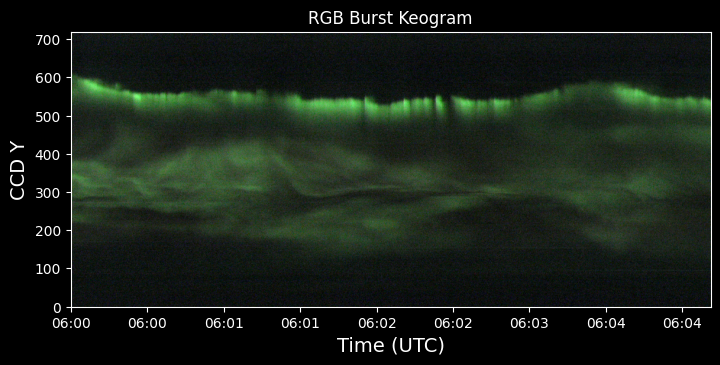

In [ ]:
# Display the keogram
keogram.plot(aspect=0.5, ytick_increment=100, title="RGB Burst Keogram")